In [37]:
import pandas as pd
import numpy as np
import quandl

In [38]:
dfOriginal = pd.read_csv("/home/anupam/stockPrediction/data/^BSESN (2).csv")

In [39]:
dfOriginal.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-06-29,26627.150391,26776.169922,26606.310547,26740.390625,26740.390625,7700
1,2016-06-30,26926.169922,27069.230469,26872.589844,26999.720703,26999.720703,8600
2,2016-07-01,27064.330078,27243.359375,27061.400391,27144.910156,27144.910156,10000
3,2016-07-04,27314.439453,27385.660156,27251.060547,27278.759766,27278.759766,8300
4,2016-07-05,27340.720703,27348.660156,27127.300781,27166.869141,27166.869141,10400


In [40]:
df = dfOriginal.set_index("Date")

In [41]:
df = df.drop(['Close'],axis=1)

In [42]:
df.head()

,Open,High,Low,Adj Close,Volume
Date,,,,,
2016-06-29,26627.150391,26776.169922,26606.310547,26740.390625,7700
2016-06-30,26926.169922,27069.230469,26872.589844,26999.720703,8600
2016-07-01,27064.330078,27243.359375,27061.400391,27144.910156,10000
2016-07-04,27314.439453,27385.660156,27251.060547,27278.759766,8300
2016-07-05,27340.720703,27348.660156,27127.300781,27166.869141,10400


In [43]:
SMA5 = df['Adj Close'].rolling(window=5).mean()
SMA10 = df['Adj Close'].rolling(window=10).mean()
SMA20 = df['Adj Close'].rolling(window=20).mean()

In [44]:
result = pd.concat([df,SMA5,SMA10,SMA20],axis=1,sort=False)

In [45]:
result.columns.values[5] = 'SMA5'
result.columns.values[6] = 'SMA10'
result.columns.values[7] = 'SMA20'

In [46]:
result.head(20)

,Open,High,Low,Adj Close,Volume,SMA5,SMA10,SMA20
Date,,,,,,,,
2016-06-29,26627.150391,26776.169922,26606.310547,26740.390625,7700,NaN,NaN,NaN
2016-06-30,26926.169922,27069.230469,26872.589844,26999.720703,8600,NaN,NaN,NaN
2016-07-01,27064.330078,27243.359375,27061.400391,27144.910156,10000,NaN,NaN,NaN
2016-07-04,27314.439453,27385.660156,27251.060547,27278.759766,8300,NaN,NaN,NaN
2016-07-05,27340.720703,27348.660156,27127.300781,27166.869141,10400,27066.130078,NaN,NaN
2016-07-07,27209.970703,27288.220703,27146.949219,27201.490234,8800,27158.350000,NaN,NaN
2016-07-08,27292.199219,27294.820313,27034.140625,27126.900391,13900,27183.785938,NaN,NaN
2016-07-11,27358.230469,27647.480469,27358.230469,27626.689453,23900,27280.141797,NaN,NaN
2016-07-12,27667.810547,27828.740234,27667.810547,27808.140625,12200,27386.017969,NaN,NaN


In [47]:
result.shape[0]

496

In [48]:
def EMAN(data,n):
    smaColumn = "SMA" + str(n)
    esmaColumn = "ESMA" + str(n)
    data[esmaColumn] = np.nan
    n=n-1
    data[esmaColumn][n] = data['Adj Close'][:n+1].values.mean()
    multiplier = 2/(n + 1 + 1)
    n = n + 1
    while n<(data.shape[0]):
        data[esmaColumn][n] = ((data['Adj Close'][n] - data[esmaColumn][n-1]) * multiplier) + data[esmaColumn][n-1]
        n = n + 1
    return data

In [49]:
result = EMAN(result,10)
result = EMAN(result,20)

/home/anupam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/anupam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [69]:
result['MACD'] = result['ESMA10'] - result['ESMA20']

In [71]:
result.head(20)

,Open,High,Low,Adj Close,Volume,SMA5,SMA10,SMA20,ESMA10,ESMA20,MACD
Date,,,,,,,,,,,
2016-06-29,26627.150391,26776.169922,26606.310547,26740.390625,7700,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-30,26926.169922,27069.230469,26872.589844,26999.720703,8600,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01,27064.330078,27243.359375,27061.400391,27144.910156,10000,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-04,27314.439453,27385.660156,27251.060547,27278.759766,8300,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-05,27340.720703,27348.660156,27127.300781,27166.869141,10400,27066.130078,NaN,NaN,NaN,NaN,NaN
2016-07-07,27209.970703,27288.220703,27146.949219,27201.490234,8800,27158.350000,NaN,NaN,NaN,NaN,NaN
2016-07-08,27292.199219,27294.820313,27034.140625,27126.900391,13900,27183.785938,NaN,NaN,NaN,NaN,NaN
2016-07-11,27358.230469,27647.480469,27358.230469,27626.689453,23900,27280.141797,NaN,NaN,NaN,NaN,NaN
2016-07-12,27667.810547,27828.740234,27667.810547,27808.140625,12200,27386.017969,NaN,NaN,NaN,NaN,NaN


In [52]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

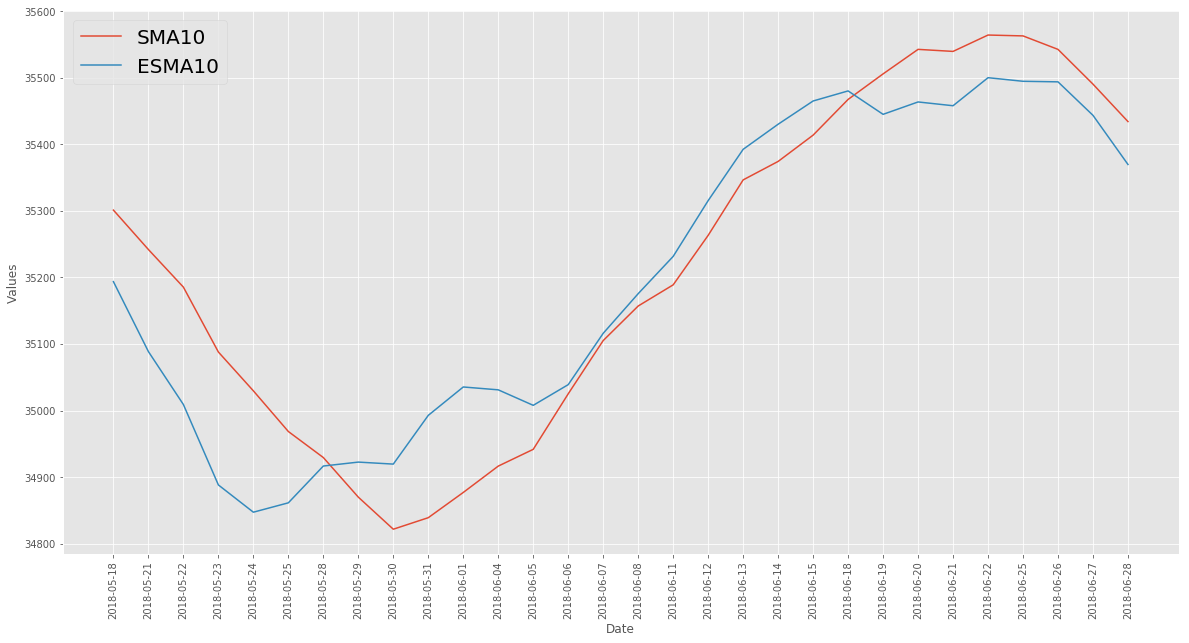

In [68]:
plt.figure(figsize=(20,10))
plt.plot(result['SMA10'][-30:])
plt.plot(result['ESMA10'][-30:])
plt.legend(fontsize=20)
plt.xlabel("Date")
plt.ylabel("Values")
plt.xticks(rotation=90)
plt.show()